# Pre Processing

#### Embedding

1. CountVectorizer
2. DictVectorizer
3. TF-IDF-Vectorizer
4. Stemming
5. Lemmatization
6. Word2Vec
7. Doc2Vec-Embedding
8. Visualize-Word-Embedding

# Embedding


**Text feature extraction**
<br>Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

**a. tokenizing:** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators

**b. counting:** the occurrences of tokens in each document

**c. normalizing:** weighting with diminishing importance tokens that occur in the majority of samples / documents

### CountVectorizer
The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [50]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### DictVectorizer
**Transforms lists of feature-value mappings to vectors**. This transformer turns lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays or scipy.sparse matrices for use with scikit-learn estimators. <br><br>When feature values are strings, this transformer will do a binary one-hot (aka one-of-K) coding: one boolean-valued feature is constructed for each of the possible string values that the feature can take on. For instance, a feature “f” that can take on the values “ham” and “spam” will become two features in the output, one signifying “f=ham”, the other “f=spam”.<br>
<br>However, this transformer will only do a binary one-hot encoding when feature values are of type string. If categorical features are represented as numeric values such as int, the DictVectorizer can be followed by sklearn.preprocessing.OneHotEncoder to complete binary one-hot encoding.

In [51]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
X = v.fit_transform(D)
X

array([[2., 0., 1.],
       [0., 1., 3.]])

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### TF-IDF Vectorizer
It will **transform the text into the feature vectors** and used as input to the estimator. The vocabulary is the dictionary that will convert each token or word in the matrix and it will get the feature index. In **CountVectorizer** we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently. To overcome this , we use TfidfVectorizer. <br>
<br>In **TfidfVectorizer** overall document weightage of a word is considered. It helps us in dealing with most frequent words.  TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',     'Is this the first document?']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [53]:
# since X is not interpretable hence it ned to be transformed into dataframe with tf-idf score 
y = vectorizer.get_feature_names()
dense = X.todense()
dense_list = dense.tolist()
df = pd.DataFrame(dense_list, columns = y)
df

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [54]:
X.shape, df.shape

((4, 9), (4, 9))

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### Stemming
Stemming is a kind of normalization for words. **Normalization** is a technique where a set of words in a sentence are converted into a sequence to shorten its lookup. The words which have the same meaning but have some variation according to the context or sentence are normalized. In another word, there is one root word, but there are many variations of the same words 
For example, the root word is "eat" and it's variations are "eats, eating, eaten and like so". In the same way, with the help of Stemming, we can find the root word of any variations. <br>
<br>NLTK has an algorithm named as "PorterStemmer". This algorithm accepts the list of tokenized word and stems it into root word 

In [55]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer  = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Stemming for {} is {}".format(w,porter_stemmer.stem(w))) 

Stemming for studies is studi
Stemming for studying is studi
Stemming for cries is cri
Stemming for cry is cri


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### Lemmatization
Lemmatization is the algorithmic process of **finding the lemma of a word depending on their meaning**. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings. It helps in returning the base or dictionary form of a word, which is known as the lemma. <br><br>
The NLTK Lemmatization method is based on WorldNet's built-in morph function. Text preprocessing includes both stemming as well as lemmatization. 

__Lemmatization is preferred over the former because of the below reason:__
Stemming algorithm works by cutting the suffix from the word. 
In a broader sense cuts either the beginning or end of the word. 
On the contrary, Lemmatization is a more powerful operation, and it takes into consideration morphological analysis 
of the words. It returns the lemma which is the base form of all its inflectional forms. 
In-depth linguistic knowledge is required to create dictionaries and look for the proper form of the word. 
Stemming is a general operation while lemmatization is an intelligent operation where the proper form will be 
looked in the dictionary. Hence, lemmatization helps in forming better machine learning features.

In [56]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duhita\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### Word2Vec

Word2Vec consists of models for generating word embedding. These models are shallow two layer neural networks having one input layer, one hidden layer and one output layer. Word2Vec utilizes two architectures : <br>
__a. CBOW (Continuous Bag of Words) :__ CBOW model predicts the current word given context words within specific window. The input layer contains the context words and the output layer contains the current word. The hidden layer contains the number of dimensions in which we want to represent current word present at the output layer.<br>__b. Skip Gram :__ Skip gram predicts the surrounding context words within specific window given current word. The input layer contains the current word and the output layer contains the context words. The hidden layer contains the number of dimensions in which we want to represent current word present at the input layer.

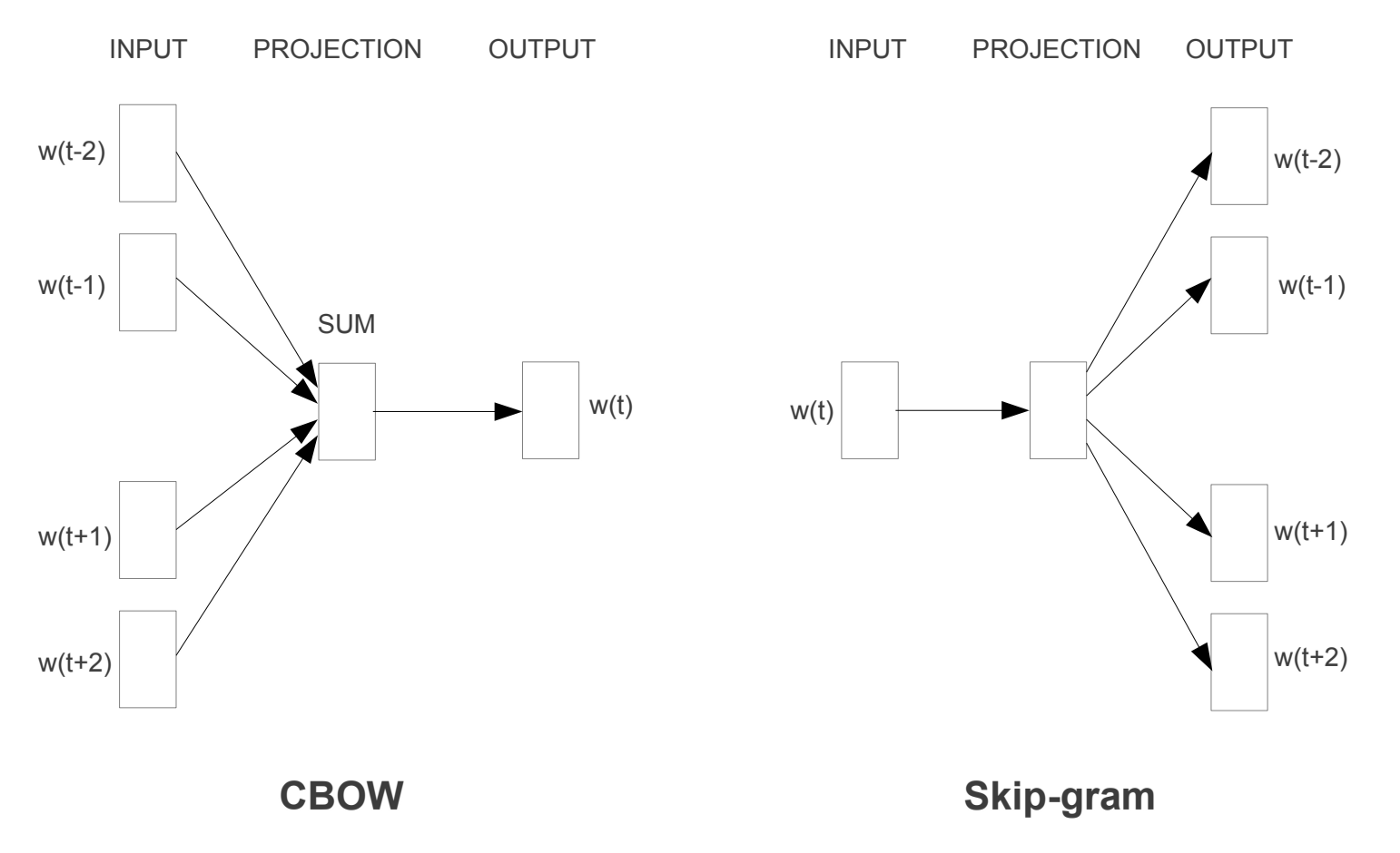

In [57]:
#install nltk and genism
#!pip install nltk
# !pip install gensim

In [58]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)


Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-5.66251867e-04  3.87575617e-03  1.84540357e-03  1.58382370e-03
  9.45792941e-04  3.48803424e-03 -2.53669987e-03  4.93331812e-04
 -5.66694885e-04 -4.55752993e-03 -1.68438279e-03  1.13758014e-03
 -3.33453924e-03  8.24440503e-04  5.63966285e-04 -4.04788647e-03
  1.69406948e-03 -4.05336311e-03  2.18737638e-03  1.77856506e-04
  2.78158677e-05  2.15033023e-03  4.62671462e-03  4.71825758e-03
 -4.11912287e-03 -1.34883891e-03 -4.89438977e-03 -3.03815072e-03
  4.99660289e-03  3.80420941e-03  2.24203314e-03  4.65277862e-03
 -1.00864237e-03  2.10219412e-03 -2.07883582e-04  6.71489630e-04
 -3.19324154e-03 -1.05077273e-03  1.78553781e-03 -3.41403787e-03
  2.49195169e-03  1.33298442e-03  4.86205128e-04  4.76346258e-03
 -7.09757034e-04 -4.02095541e-03 -3.35455616e-03 -1.32341648e-03
 -2.16815024e-04 -4.70665609e-03 -2.04724167e-03 -1.16777

C:\Users\duhita\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


<br>• Output indicates the cosine similarities between word vectors ‘alice’, ‘wonderland’ and ‘machines’ for different models<br>• Both have their own advantages and disadvantages. Skip Gram works well with small amount of data and is found to represent rare words well.<br>
• On the other hand, CBOW is faster and has better representations for more frequent words.

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

### Doc2Vec Embedding

__Syntax__ <br> class gensim.models.doc2vec.Doc2Vec(documents=None, corpus_file=None, dm_mean=None, dm=1, dbow_words=0, dm_concat=0, dm_tag_count=1, docvecs=None, docvecs_mapfile=None, comment=None, trim_rule=None, callbacks=(), **kwargs)
<br> __How it works__ <br>• Doc2Vec is another widely used technique that creates an embedding of a document irrespective to its length. While Word2Vec computes a feature vector for every word in the corpus, Doc2Vec computes a feature vector for every document in the corpus<br>• Doc2vec model is based on Word2Vec, with only adding another vector (paragraph ID) to the input<br>• The Doc2Vec model, by analogy with Word2Vec, can rely on one of two model architectures which are: Distributed Memory version of Paragraph Vector (PV-DM) and Distributed Bag of Words version of Paragraph Vector (PV-DBOW)
<br>• In the figure below, we show the model architecture of PV-DM:

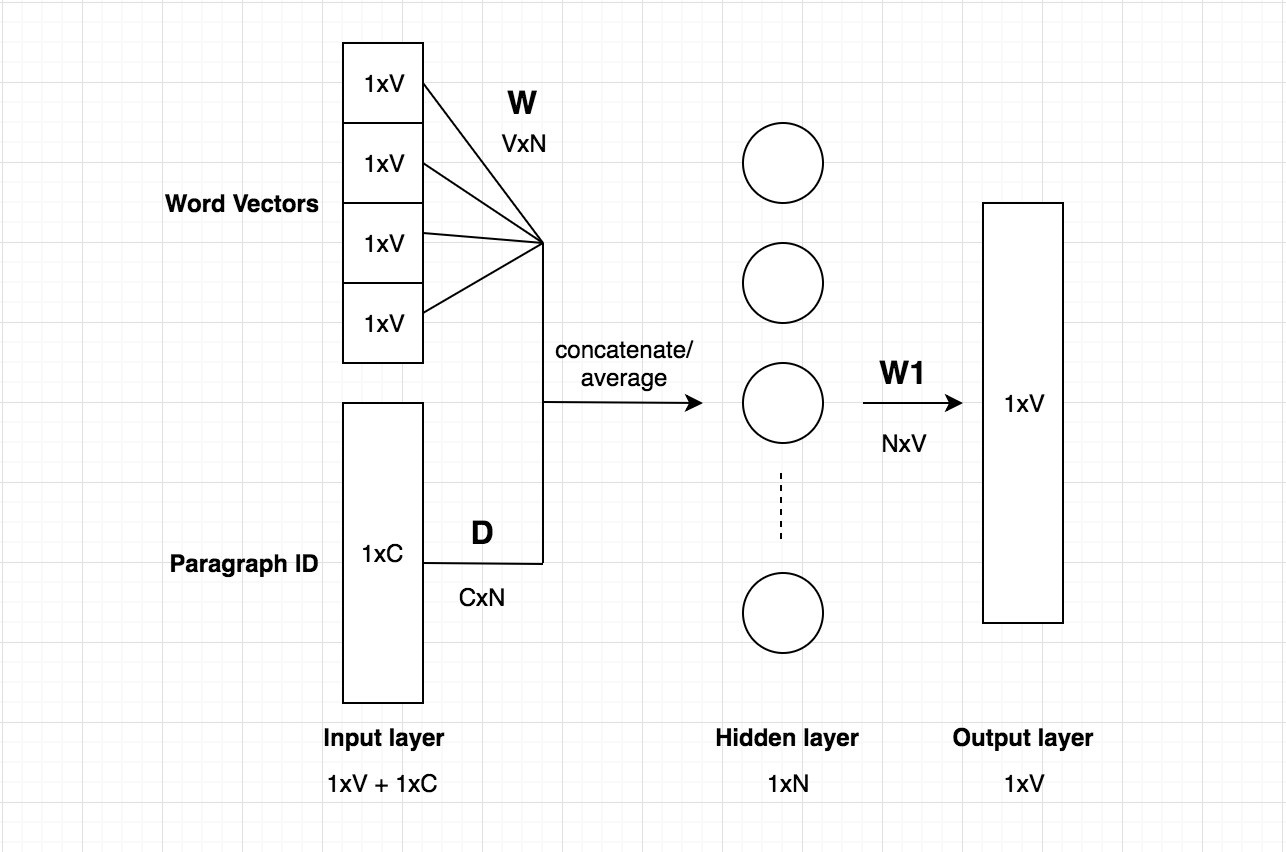

<br>• The above diagram is based on the CBOW model, but instead of using just nearby words to predict the word, we also added another feature vector, which is document-unique<br>• So when training the word vectors W, the document vector D is trained as well, and at the end of training, it holds a numeric representation of the document<br>• 
The inputs consist of word vectors and document Id vectors. The word vector is a one-hot vector with a dimension 1xV. The document Id vector has a dimension of 1xC, where C is the number of total documents. The dimension of the weight matrix W of the hidden layer is NxV. The dimension of the weight matrix D of the hidden layer is CxN

In [59]:
#INITIALIZE AND TRAIN A MODEL
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

print("Corpus")
print('======')
print (common_texts) 
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]

print('List of documents:')
print('==================')
for doc in documents:
    print(doc)

model = Doc2Vec(documents, size=5, window=2, min_count=1, workers=4)

#PERSIST A MODEL TO DESC:
 
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("my_doc2vec_model")
model.save(fname)
model = Doc2Vec.load(fname)  

#If you’re finished training a model (=no more updates, only querying, reduce memory usage), you can do:

model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True) 

#INFER VECTOR FOR NEW DOCUMENT:
#Here our text paragraph just 2 words
vector = model.infer_vector(["system", "response"])
print ('\nVector format for words ==>',vector)

Corpus
[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]
List of documents:
TaggedDocument(['human', 'interface', 'computer'], [0])
TaggedDocument(['survey', 'user', 'computer', 'system', 'response', 'time'], [1])
TaggedDocument(['eps', 'user', 'interface', 'system'], [2])
TaggedDocument(['system', 'human', 'system', 'eps'], [3])
TaggedDocument(['user', 'response', 'time'], [4])
TaggedDocument(['trees'], [5])
TaggedDocument(['graph', 'trees'], [6])
TaggedDocument(['graph', 'minors', 'trees'], [7])
TaggedDocument(['graph', 'minors', 'survey'], [8])

Vector format for words ==> [-0.01764038 -0.01116892 -0.08235094 -0.05593868 -0.03623259]


C:\Users\duhita\anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>

# Visualize Word Embedding
After we do word embedding for our text data, it can be nice to explore it with visualization.
We can use classical projection methods to reduce the high-dimensional word vectors to two-dimensional plots and plot them on a graph.
The visualizations can provide a qualitative diagnostic for our learned model.
We can retrieve all of the vectors from a trained model

We can then train a projection method on the vectors, such as those methods offered in scikit-learn, then use matplotlib to plot the projection as a scatter plot.

**Plot Word Vectors Using PCA**<br>
A 2-dimensional PCA model of the word vectors using the scikit-learn PCA class can be created as follows. The resulting projection can be plotted using matplotlib as follows, pulling out the two dimensions as x and y coordinates. We can go one step further and annotate the points on the graph with the words themselves. A crude version without any nice offsets looks as follows.

C:\Users\duhita\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


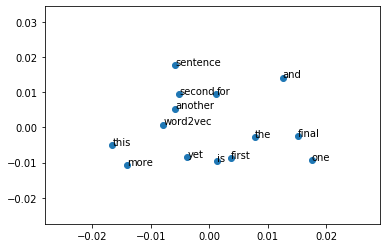

In [60]:
#Putting this all together with the model from the previous section, the complete example is listed below.
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Pre-Processing" role="tab" aria-controls="settings">Go to Top<span class="badge badge-primary badge-pill"></span></a>